<a href="https://colab.research.google.com/github/jupastro/Mitochondria-StyleTransfer/blob/main/SSL__StyleTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameters Setup


## Github repository cloning

In [1]:
!rm -R Self*
!wget https://github.com/jupastro/Mitochondria-StyleTransfer/archive/refs/heads/main.zip
!unzip main.zip 
!mkdir SelfSupervisedLearning
!mv Mitochondria-StyleTransfer-main/functions.py SelfSupervisedLearning/
!rm -R Mitochondria-StyleTransfer-main
!rm main.zip

rm: cannot remove 'Self*': No such file or directory
--2021-11-15 17:38:11--  https://github.com/jupastro/Mitochondria-StyleTransfer/archive/refs/heads/main.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/jupastro/Mitochondria-StyleTransfer/zip/refs/heads/main [following]
--2021-11-15 17:38:11--  https://codeload.github.com/jupastro/Mitochondria-StyleTransfer/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 192.30.255.120
Connecting to codeload.github.com (codeload.github.com)|192.30.255.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [ <=>                ]  18.97K  --.-KB/s    in 0.1s    

2021-11-15 17:38:12 (153 KB/s) - ‘main.zip’ saved [19428]

Archive:  main.zip
b6210a57b3d9f91d375f77c8ff3

## Data Set download

In [3]:
!gdown --id 1tBEusvhbH-AhEdaFfBUcVIQTfzbBq9Wd
!unzip Downloads.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
 extracting: Datasets/Kasthuri++_incomp/Lucchi++/train/x/mask0092.png  
 extracting: Datasets/Kasthuri++_incomp/Lucchi++/train/x/mask0093.png  
 extracting: Datasets/Kasthuri++_incomp/Lucchi++/train/x/mask0094.png  
 extracting: Datasets/Kasthuri++_incomp/Lucchi++/train/x/mask0095.png  
 extracting: Datasets/Kasthuri++_incomp/Lucchi++/train/x/mask0096.png  
 extracting: Datasets/Kasthuri++_incomp/Lucchi++/train/x/mask0097.png  
 extracting: Datasets/Kasthuri++_incomp/Lucchi++/train/x/mask0098.png  
 extracting: Datasets/Kasthuri++_incomp/Lucchi++/train/x/mask0099.png  
 extracting: Datasets/Kasthuri++_incomp/Lucchi++/train/x/mask0100.png  
 extracting: Datasets/Kasthuri++_incomp/Lucchi++/train/x/mask0101.png  
 extracting: Datasets/Kasthuri++_incomp/Lucchi++/train/x/mask0102.png  
 extracting: Datasets/Kasthuri++_incomp/Lucchi++/train/x/mask0103.png  
 extracting: Datasets/Kasthuri++_incomp/Lucchi++/train/x/mask0104.png  
 ex

## Hyperparameters specification

In [25]:

#GPU selection 
filter_dataset1=True#@param {type:"boolean"}
filter_dataset2=True#@param {type:"boolean"}
pretrain_model1=True#@param {type:"boolean"}
pretrain_model2=True#@param {type:"boolean"}
GPU_availability=True#@param {type:"boolean"}
show_images=True#@param {type:"boolean"}
GPU="2"#Perform and nvidia-smi to check which free gpus are available 
#Parameters to be modified:
plot_history=True#@param {type:"boolean"}
factor=4  #@param {type:"integer"}
noise=0.2 #@param {type:"number"}

 #@title **Pretraining Hyperparameters**

# === PreTraining parameters ===
# number of epochs
numEpochsPretrain =  30#@param {type:"integer"}
# patience
patiencePretrain =  30#@param {type:"integer"}
# learning rate
lrPretrain = 5e-4 #@param {type:"number"}
# batch size
batch_size_valuePretrain =  6#@param {type:"integer"}
# use one-cycle policy for super-convergence? Reduce on plateau?
no_schedule = None #@param {type:"raw"}
schedulePretrain = 'oneCycle' #@param [ "no_schedule","'oneCycle'","'reduce'"] {type:"raw"}

# Network architecture: UNet, ResUNet,MobileNetEncoder
model_namePretrain = 'AttentionUNET'#@param ['UNet','MobileNetEncoder','AttentionUNET']
# Optimizer name: 'Adam', 'SGD'
optimizer_namePretrain = 'Adam'#@param ['Adam','SGD']{type:"string"}
# Loss function name: 'BCE', 'Dice', 'W_BCE_Dice'
loss_acronymPretrain = 'mse' #@param ['mae','mse']{type:"string"}
max_poolingPretrain=True #@param {type:"boolean"}

#@title **Training Hyperparameters**

# === Training parameters ===
# number of epochs
numEpochs =  60#@param {type:"integer"}
# patience
patience = 60#@param {type:"integer"}
# learning rate
lr =1e-4 #@param {type:"number"}
# batch size
batch_size_value = 1#@param {type:"integer"}
# use one-cycle policy for super-convergence? Reduce on plateau?
schedule = no_schedule #@param [ "no_schedule","'oneCycle'","'reduce'"] {type:"raw"}
# Network architecture: UNet, ResUNet,MobileNetEncoder
model_name = 'AttentionUNET' #@param ['UNet','MobileNetEncoder','AttentionUNET']
# Optimizer name: 'Adam', 'SGD'
optimizer_name = 'Adam' #@param ['Adam','SGD']{type:"string"}
# Loss function name: 'BCE', 'Dice', 'W_BCE_Dice'
loss_acronym = 'BCE' #@param ['BCE','Dice','SEG']{type:"string"}
# create the network and compile it with its optimizer
max_pooling=True #@param {type:"boolean"}

repetitions=1#@param {type:"slider", min:1, max:30, step:1}
train_encoder=False #@param {type:"boolean"}
bottleneck_freezing=False #@param {type:"boolean"}
#Select dataset-route {'Lucchi++','Kasthuri++','Achucarro','VNC'}
#
Dataset1='Kasthuri++'#@param ['Lucchi++','Kasthuri++','Achucarro','VNC']
Dataset2='VNC'#@param ['Lucchi++','Kasthuri++','Achucarro','VNC']
histogram_matching=False
if histogram_matching:
    hm='hm'
else:
    hm=''
testName=Dataset1+'_'+Dataset2+'_'+model_name+'_'+hm 


train_input_path1 = '/content/Datasets/'+Dataset1+'/train/x'
train_label_path1 = '/content/Datasets/'+Dataset1+'/train/y'
test_input_path1 = '/content/Datasets/'+Dataset1+'/test/x'
test_label_path1 = '/content/Datasets/'+Dataset1+'/test/y'

train_input_path2 = '/content/Datasets/'+Dataset2+'/train/x'
train_label_path2 = '/content/Datasets/'+Dataset2+'/train/y'
test_input_path2 = '/content/Datasets/'+Dataset2+'/test/x'
test_label_path2 = '/content/Datasets/'+Dataset2+'/test/y'

train_input_path1_hm = '/content/hist_match/'+Dataset1+'/'+Dataset1+'_s-t_'+Dataset2+'/train/x'
train_label_path1_hm = '/content/hist_match/'+Dataset1+'/'+Dataset1+'_s-t_'+Dataset2+'/train/y'
test_input_path1_hm = '/content/hist_match/'+Dataset1+'/'+Dataset1+'_s-t_'+Dataset2+'/test/x'
test_label_path1_hm = '/content/hist_match/'+Dataset1+'/'+Dataset1+'_s-t_'+Dataset2+'/test/y'

train_input_path2_hm = '/content/hist_match/'+Dataset2+'/'+Dataset2+'_s-t_'+Dataset1+'/train/x'
train_label_path2_hm = '/content/hist_match/'+Dataset2+'/'+Dataset2+'_s-t_'+Dataset1+'/train/y'
test_input_path2_hm = '/content/hist_match/'+Dataset2+'/'+Dataset2+'_s-t_'+Dataset1+'/test/x'
test_label_path2_hm = '/content/hist_match/'+Dataset2+'/'+Dataset2+'_s-t_'+Dataset1+'/test/y'

import pandas as pd
import numpy as np
hyperparameters=[['Dataset 1','Dataset 2','Epochs Pre','patience Pre','lr Pre','batch size Pre','scheduler pre','model','optimizer pre','loss pre','Epochs','Patience','Lr','Batch size','Scheduler','Optimizer','Iterations','Train Encoder','BottleNeck freezing'],[Dataset1,Dataset2,numEpochsPretrain,patiencePretrain,lrPretrain,batch_size_valuePretrain,schedulePretrain,model_name,optimizer_namePretrain,loss_acronymPretrain,numEpochs,patience,lr,batch_size_value,schedule,optimizer_name,repetitions,train_encoder,bottleneck_freezing]]
df=pd.DataFrame(hyperparameters)
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header 
print(df)



0   Dataset 1 Dataset 2 Epochs Pre  ... Iterations Train Encoder BottleNeck freezing
1  Kasthuri++       VNC         30  ...          1         False               False

[1 rows x 19 columns]


# Code Execution

### Imports and folder creation

In [26]:
import sys
#@title
# Make sure TF 2 is used
import tensorflow
print(tensorflow.__version__)
!pip install -q git+https://github.com/tensorflow/examples.git
from tensorflow_examples.models.pix2pix import pix2pix
from scipy.sparse.construct import rand
sys.path.append('SelfSupervisedLearning/') #in order to access functions.py 
from functions import *
#from hyperparameters import  * #show_images,plot_history,factor,noise,testName,numEpochsPretrain ,patiencePretrain ,lrPretrain ,batch_size_valuePretrain ,no_schedule,schedulePretrain,model_namePretrain,optimizer_namePretrain ,loss_acronymPretrain ,max_poolingPretrain,numEpochs ,patience,lr,batch_size_value ,schedule ,model_name ,optimizer_name ,loss_acronym ,max_pooling,repetitions,train_encoder,bottleneck_freezing,GPU
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np


#gpu selection 
#gpu_select(GPU_availability,GPU)
random_patches=True
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# session = tf.Session(config=config)
try:
  os.mkdir(testName)
except:
 print('Already created folder')

try:
  os.mkdir('Plots')
except:
 print('Already created folder')

try:
  os.mkdir('Prediction1')
except:
 print('Already created folder')
try:
  os.mkdir('Prediction2')
except:
 print('Already created folder')



2.7.0
Already created folder
Already created folder
Already created folder
Already created folder


### Pretraining step

#### Pretraining step style Dataset 1

Load dataset 1 and its corresponding patches

2.7.0
Loading data sets according to style of...Kasthuri++
Loading data from /content/Datasets/Kasthuri++/train/x
Dataset input images loaded: 85
Dataset label images loaded: 85
Randomly cropping patches from the original image
Number of patches and labels is equal
Se han eliminado:4552 patches no informativos.
Randomly cropping patches from the original image


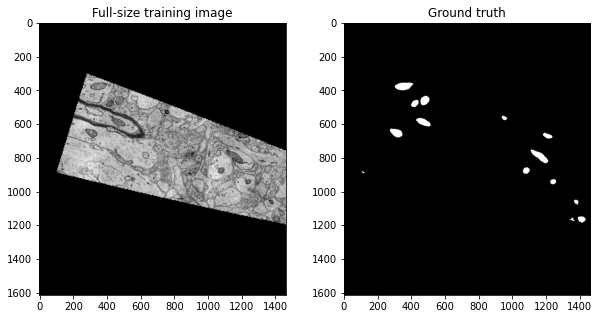

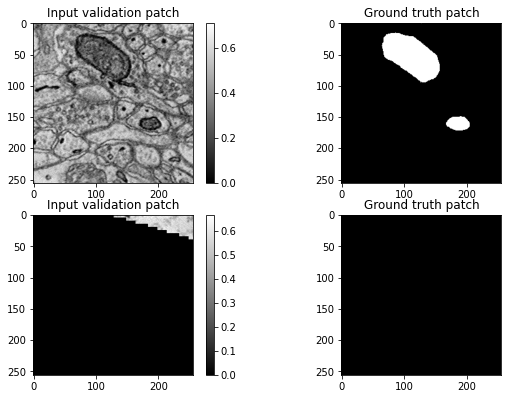

In [27]:

nameSavingFile=str((testName+'.xlsx'))


#fix the seed to reproduce results
set_seed(42)

print( tf.__version__ )


print('Loading data sets according to style of...'+ Dataset1)
##### Loading the dataset1 for pretraining according to 
# Read the list of file names
train_img1,train_lbl1=load_img(train_input_path1,train_label_path1)


# display first image
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow( train_img1[0], 'gray' )
plt.title( 'Full-size training image' );
# and its "ground truth"
plt.subplot(1, 2, 2)
plt.imshow( train_lbl1[0], 'gray' )
plt.title( 'Ground truth' );
plt.savefig('Plots/'+Dataset1+"_training_imgs_style"+Dataset1+".png" )

#Loading train and validation splits

train_img1, val_img1, train_lbl1, val_lbl1 = train_test_split(train_img1,
                                                        train_lbl1,
                                                        train_size=1-0.1,
                                                        test_size=0.1,
                                                        random_state=42, shuffle=False)

train_img_patches1,train_lbl_patches1=create_patches(train_img1,train_lbl1,(256,256),random_patches=random_patches)
del train_img1,train_lbl1
if filter_dataset1:
  train_img_patches1,train_lbl_patches1=filter_patches(train_img_patches1,train_lbl_patches1,percent=0.2)

val_img_patches1,val_lbl_patches1=create_patches(val_img1,val_lbl1,(256,256),random_patches=random_patches)
del val_img1,val_lbl1
num=3
plt.figure(figsize=(10,10))
for i in range(1,num+1,2):
  
  plt.subplot(num, 2, i)
  plt.imshow( val_img_patches1[i] ,'gray')
  plt.colorbar()
  plt.title( 'Input validation patch' );
  # and its "ground truth"
  plt.subplot(num, 2, i+1)
  plt.imshow( val_lbl_patches1[i] ,'gray')
  plt.title( 'Ground truth patch' );
plt.savefig('Plots/'+Dataset1+"_validation_patches_style"+Dataset1+".png" )


Loading data from /content/hist_match/VNC/VNC_s-t_Kasthuri++/train/x
Dataset input images loaded: 20
Dataset label images loaded: 20
Randomly cropping patches from the original image
Number of patches and labels is equal
Se han eliminado:272 patches no informativos.
Randomly cropping patches from the original image


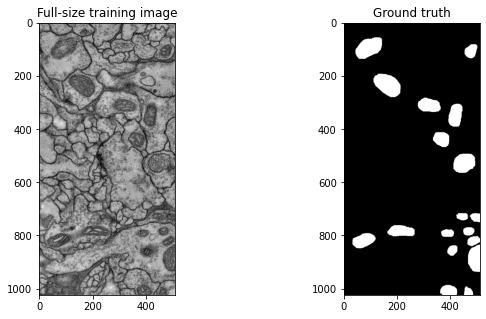

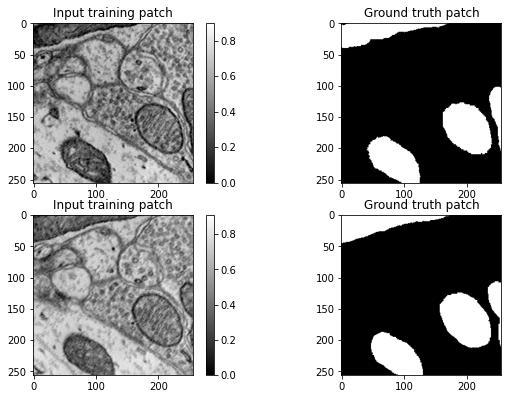

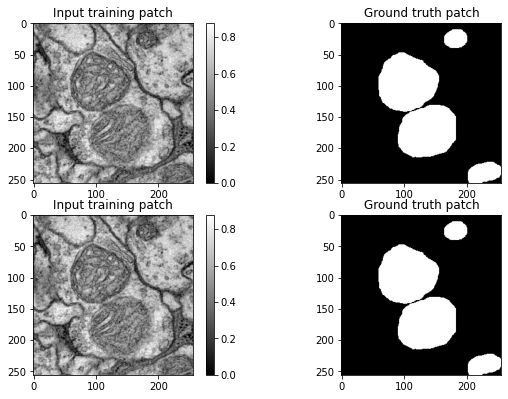

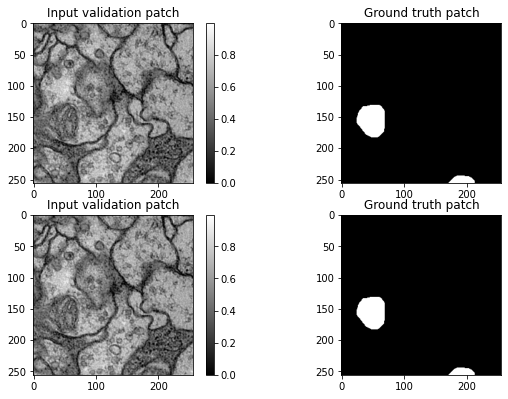

In [28]:




# Read the list of file names
train_img2,train_lbl2=load_img(train_input_path2_hm,train_label_path2_hm)

# display first image
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow( train_img2[0], 'gray' )

plt.title( 'Full-size training image' );
# and its "ground truth"
plt.subplot(1, 2, 2)
plt.imshow( train_lbl2[0], 'gray' )
plt.title( 'Ground truth' );
plt.savefig('Plots/'+Dataset2+"_training_imgs_style"+Dataset1+".png" )



#@title
#Loading train and validation splits

train_img2, val_img2, train_lbl2, val_lbl2 = train_test_split(train_img2,
                                                        train_lbl2,
                                                        train_size=1-0.1,
                                                        test_size=0.1,
                                                        random_state=42, shuffle=False)

"""## Preparing the pre-training data

"""


percentage_data=1 #parameter to be changed in between 0-1 to reduce  randomly the number of annotated patches to be used during training



num=3
plt.figure(figsize=(10,10))
for i in range(1,num+1,2):
  
  plt.subplot(num, 2, i)
  plt.imshow( train_img_patches1[i] ,'gray')
  plt.colorbar()
  plt.title( 'Input training patch' );
  # and its "ground truth"
  plt.subplot(num, 2, i+1)
  plt.imshow( train_lbl_patches1[i] ,'gray')
  plt.title( 'Ground truth patch' );
plt.savefig('Plots/'+Dataset1+"_training_patches_style"+Dataset1+".png" )



train_img_patches2,train_lbl_patches2=create_patches(train_img2,train_lbl2,(256,256),random_patches=random_patches)
del train_img2,train_lbl2
if filter_dataset2:
  train_img_patches2,train_lbl_patches2=filter_patches(train_img_patches2,train_lbl_patches2,percent=0.2)
plt.figure(figsize=(10,10))
for i in range(1,num+1,2):
  
  plt.subplot(num, 2, i)
  plt.imshow( train_img_patches2[i] ,'gray')
  plt.colorbar()
  plt.title( 'Input training patch' );
  # and its "ground truth"
  plt.subplot(num, 2, i+1)
  plt.imshow( train_lbl_patches2[i] ,'gray')
  plt.title( 'Ground truth patch' );
plt.savefig('Plots/'+Dataset2+"_training_patches_style"+Dataset1+".png")


val_img_patches2,val_lbl_patches2=create_patches(val_img2,val_lbl2,(256,256),random_patches=random_patches)
del val_img2,val_lbl2
plt.figure(figsize=(10,10))
for i in range(1,num+1,2):
  
  plt.subplot(num, 2, i)
  plt.imshow( val_img_patches2[i] ,'gray')
  plt.colorbar()
  plt.title( 'Input validation patch' );
  # and its "ground truth"
  plt.subplot(num, 2, i+1)
  plt.imshow( val_lbl_patches2[i] ,'gray')
  plt.title( 'Ground truth patch' );
plt.savefig('Plots/'+Dataset2+"_validation_patches_style"+Dataset1+".png")




Loading data from /content/Datasets/Kasthuri++/test/x
Dataset input images loaded: 75
Dataset label images loaded: 75
Loading data from /content/hist_match/VNC/VNC_s-t_Kasthuri++/test/x
Dataset input images loaded: 20
Dataset label images loaded: 20
Randomly cropping patches from the original image
Number of patches and labels is equal
Se han eliminado:4481 patches no informativos.
Randomly cropping patches from the original image
Number of patches and labels is equal
Se han eliminado:320 patches no informativos.


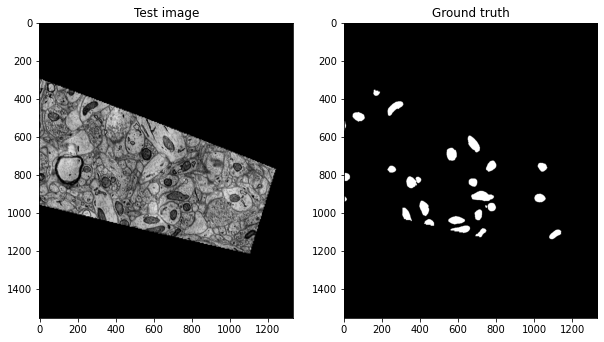

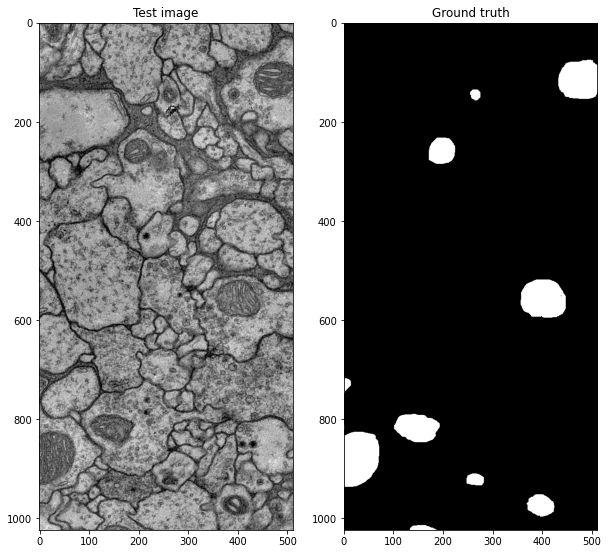

In [29]:


#### Self-supervised pretraining

#Create test patches to include in the pretraining
#@title
"""Now we will check the number of images and masks:"""

test_img1,test_lbl1=load_img(test_input_path1,test_label_path1)

# Display corresponding first patch at low resolution
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow( test_img1[0], 'gray' )
plt.title( 'Test image' )
# Side by side with its "ground truth"
plt.subplot(1, 2, 2)
plt.imshow( test_lbl1[0], 'gray' )
plt.title( 'Ground truth' )
plt.savefig('Plots/'+Dataset1+"_test_imgs_style"+Dataset1+".png" )

# Read the list of file names
test_img2,test_lbl2=load_img(test_input_path2_hm,test_label_path2_hm)


# Display corresponding first patch at low resolution
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow( test_img2[0], 'gray' )
plt.title( 'Test image' )
# Side by side with its "ground truth"
plt.subplot(1, 2, 2)
plt.imshow( test_lbl2[0], 'gray' )
plt.title( 'Ground truth' )
plt.savefig('Plots/'+Dataset2+"_test_imgs_style"+Dataset1+".png" )

test_img_patches1,test_lbl_patches1=create_patches(test_img1,test_lbl1,(256,256),random_patches=random_patches)
del test_img1,test_lbl1
if filter_dataset1:
  test_img_patches1,test_lbl_patches1=filter_patches(test_img_patches1,test_lbl_patches1,percent=0.2)

test_img_patches2,test_lbl_patches2=create_patches(test_img2,test_lbl2,(256,256),random_patches=random_patches)

del test_img2,test_lbl2
if filter_dataset2:
  test_img_patches2,test_lbl_patches2=filter_patches(test_img_patches2,test_lbl_patches2,percent=0.2)



#from SelfSupervisedLearning.general_functions import add_Gaussian_Noise,crappify
 #Here we mix both datasets so that we can perform the pretraining step
train_img_patches=train_img_patches1+train_img_patches2+test_img_patches1+test_img_patches2
val_img_patches=val_img_patches1+val_img_patches2
size_train1=len(train_img_patches1)
del train_img_patches1,train_img_patches2,test_img_patches1,test_img_patches2,val_img_patches1,val_img_patches2

(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
The range of max values is between: 0.8173183370494701 and 0.9384212592019825
The range of max values is between: 0.8509803921568627 and 0.996078431372549
The range of max values is between: 0.0 and 0.9774046751641415
The range of max values is between: 0.0 and 1.0


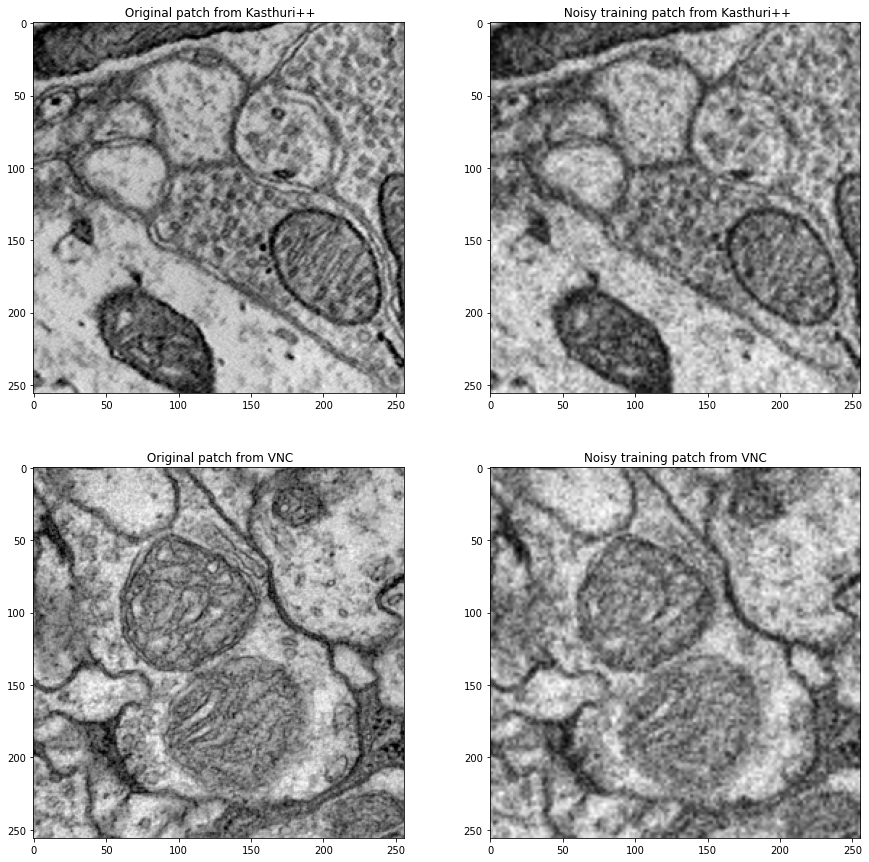

In [30]:

"""**There are 3 options to perform the pretraining step:**
* `hide_fragments`: is meant to perform inpainting it hides fragments of the image by setting them to zero, we can choose the size of the fragments as well as the percentage of the image hidden
* `add_Gaussian_Noise`: is meant to perform denoising by adding Normal Gaussian Noise N(0,$\sigma$) to the images. 
* `crappify`: is meant to simulate superresolution so that we start by adding noise to the image and then downsizing and upsizing it.
"""

#@title
# We will use these patches as "ground truth" for the pretraining step
noisy_train_img=[crappify(x,resizing_factor=factor,add_noise=True,noise_level=noise) for x in train_img_patches]
X_train,Y_train=prepare_training_data(noisy_train_img,train_img_patches)
del noisy_train_img,train_img_patches
noisy_val_img=[crappify(x,resizing_factor=factor,add_noise=True,noise_level=noise) for x in val_img_patches]
X_val,Y_val=prepare_training_data(noisy_val_img,val_img_patches)
del noisy_val_img,val_img_patches

"""###Pretraining - Super resolution

The idea is to **pretrain the network by using the noisy patches** previously created as the input and the **pretraining ground_truth would be the original images**. 

This procedure is meant to **enhance the initial weights of our model to afterwards improve its segmentation performance and its transferability to the target domain**.

As loss function, we use the mean squared error (MSE) between the expected and the predicted pixel values, and we also include the mean absolute error (MAE) as a control metric.

For this step **we will use all the training data**, as even simulating scarcity of labelled data, the unlabelled data might still be available for being used in SSL super resolution.

Furthermore we will evaluate the PSNR SSNR
"""

#@title
# Prepare the training data and create data generators





evaluate_ranges(X_train)
evaluate_ranges(Y_train)
evaluate_ranges(X_val)
evaluate_ranges(Y_val)



# Display corresponding first 3 patches
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
plt.imshow( Y_train[0,:,:,0], 'gray' )
plt.title( ' Original patch from '+Dataset1 )
# Side by side with its "ground truth"
plt.subplot(2, 2, 2)
plt.imshow( X_train[0,:,:,0], 'gray' )
plt.title( ' Noisy training patch from '+Dataset1 )

plt.subplot(2, 2, 3)
plt.imshow( Y_train[size_train1+3,:,:,0], 'gray' )
plt.title( ' Original patch from '+Dataset2 )
# Side by side with its "ground truth"
plt.subplot(2, 2, 4)
plt.imshow( X_train[size_train1+3,:,:,0], 'gray' )
plt.title( 'Noisy training patch from '+Dataset2  )

plt.savefig('Plots/'+"Pretraining_patches_imgs_style"+Dataset1+".png" )

#@title


In [ ]:

if pretrain_model1:
  tf.keras.backend.clear_session()
  history,model=train(X_train,Y_train,X_val,Y_val,numEpochsPretrain,1,patiencePretrain,lrPretrain,lrPretrain,batch_size_valuePretrain,schedulePretrain,model_name,optimizer_namePretrain,loss_acronymPretrain,max_poolingPretrain,train_encoder=True,Denoising=True,preTrain=True,check_ev=False,path_save='saved_denoised_models')
  print('Pre-trained weights are ready to be used!')

  model.save_weights('Pretrained_model_style_'+Dataset1+'.h5')

  #Evaluar métricas denoising sobre entrenamiento, validación y test

  psnr_array_noise = []


  print('\n# Generate predictions for all validation samples')

  for i in range(0, len(X_val)):
    pred = X_val[i][:,:,0];
    psnr_array_noise.append(metrics.peak_signal_noise_ratio(pred, Y_val[i][:,:,0]));
  psnr_mean_noise = np.mean(psnr_array_noise)

  ssim_array_noise = []
  for i in range(0, len(X_val)):
    pred = X_val[i][:,:,0];
    ssim_array_noise.append(metrics.structural_similarity(pred, Y_val[i][:,:,0]));
  ssim_mean_noise = np.mean(ssim_array_noise)

  print("PSNR original:", psnr_mean_noise)
  print("SSIM original:", ssim_mean_noise)
  file1 = open(testName+'.txt',"a")
  import pandas as pd
  # \n is placed to indicate EOL (End of Line)
  file1.write(Dataset1+"PSNR original: "+ str(psnr_mean_noise)+'\n')
  file1.write(Dataset1+"SSIM original:"+ str(ssim_mean_noise)+'\n')
  file1.close() #to change file access modes
 
  #Evaluar métricas denoising sobre entrenamiento, validación y test

  psnr_array = []


  print('\n# Generate predictions for all validation samples')
  predictions = model.predict(X_val)
  for i in range(0, len(predictions)):
    pred = np.clip( predictions[i][:,:,0], a_min=0, a_max=1 );
    psnr_array.append(metrics.peak_signal_noise_ratio(pred, Y_val[i][:,:,0]));
  psnr_mean = np.mean(psnr_array)

  ssim_array = []
  for i in range(0, len(predictions)):
    pred = np.clip( predictions[i][:,:,0], a_min=0, a_max=1 );
    ssim_array.append(metrics.structural_similarity(pred, Y_val[i][:,:,0]));
  ssim_mean = np.mean(ssim_array)

  print("PSNR reconstructed:", psnr_mean)
  print("SSIM reconstructed:", ssim_mean)
  # \n is placed to indicate EOL (End of Line)
  file1 = open(testName+'.txt',"a")

  file1.write("PSNR reconstructed: "+ str(psnr_mean)+'\n')
  file1.write("SSIM reconstructed:"+ str(ssim_mean)+'\n')
  file1.close() #to change file access modes
  
  """Now it would be interesting to visualize our output data to check what does the output of our net look like. """

    #@title
  try:
    print('predictions shape:', predictions.shape)
    # Display corresponding first 3 patches
    plt.figure(figsize=(15,15))
    plt.subplot(3, 3, 1)
    plt.imshow( val_img_patches[0], 'gray' )
    plt.title( 'Validation original image' )
    # Side by side with its "ground truth"
    plt.subplot(3, 3, 2)
    plt.imshow( noisy_val_img[0], 'gray' )
    plt.title( 'Image with added noise' )
    # and its prediction
    plt.subplot(3, 3, 3)
    plt.imshow( predictions[0,:,:,0], cmap='gray' )
    plt.title( 'Denoised image' )

    plt.subplot(3, 3, 4)
    plt.imshow( val_img_patches[1], 'gray' )
    plt.title( 'Validation original image' )
    # Side by side with its "ground truth"
    plt.subplot(3, 3, 5)
    plt.imshow( noisy_val_img[1], 'gray' )
    plt.title( 'Image with added noise' )
    # and its prediction
    plt.subplot(3, 3, 6)
    plt.imshow( predictions[1,:,:,0], cmap= 'gray' )
    plt.title( 'Denoised image' )

    plt.subplot(3, 3, 7)
    plt.imshow( val_img_patches[-1], 'gray' )
    plt.title( 'Validation original image' )
    # Side by side with its "ground truth"
    plt.subplot(3, 3, 8)
    plt.imshow( noisy_val_img[-1], 'gray' )
    plt.title( 'Image with added noise' )
    # and its prediction
    plt.subplot(3, 3, 9)
    plt.imshow( predictions[-1,:,:,0], cmap= 'gray' )
    plt.title( 'Denoised image' )
    plt.savefig('Plots/'+'Pretraining_predictions_style'+Dataset1+'.png')
  except:
    print('Problem when printing superresolution predictions it requires to use X_train,X_val...')

  del model
del X_train,X_val,Y_train,Y_val



data augmentation: Done!
input_1 True
conv2d True
activation True
dropout True
conv2d_1 True
activation_1 True
max_pooling2d True
conv2d_2 True
activation_2 True
dropout_1 True
conv2d_3 True
activation_3 True
max_pooling2d_1 True
conv2d_4 True
activation_4 True
dropout_2 True
conv2d_5 True
activation_5 True
max_pooling2d_2 True
conv2d_6 True
activation_6 True
dropout_3 True
conv2d_7 True
activation_7 True
max_pooling2d_3 True
conv2d_8 True
activation_8 True
dropout_4 True
conv2d_9 True
activation_9 True
conv2d_transpose True
conv2d_10 True
conv2d_11 True
add True
activation_10 True
conv2d_12 True
activation_11 True
multiply True
concatenate True
conv2d_13 True
activation_12 True
dropout_5 True
conv2d_14 True
activation_13 True
conv2d_transpose_1 True
conv2d_15 True
conv2d_16 True
add_1 True
activation_14 True
conv2d_17 True
activation_15 True
multiply_1 True
concatenate_1 True
conv2d_18 True
activation_16 True
dropout_6 True
conv2d_19 True
activation_17 True
conv2d_transpose_2 True
con

In [ ]:

train_img2,train_lbl2=load_img(train_input_path2_hm,train_label_path2_hm)

train_img2, val_img2, train_lbl2, val_lbl2 = train_test_split(train_img2,
                                                        train_lbl2,
                                                        train_size=1-0.1,
                                                        test_size=0.1,
                                                        random_state=42, shuffle=False)

train_img_patches2,train_lbl_patches2=create_patches(train_img2,train_lbl2,(256,256),random_patches=random_patches)

del train_img2,train_lbl2
if filter_dataset2:
  train_img_patches2,train_lbl_patches2=filter_patches(train_img_patches2,train_lbl_patches2,percent=0.2)

val_img_patches2,val_lbl_patches2=create_patches(val_img2,val_lbl2,(256,256),random_patches=random_patches)

del val_img2,val_lbl2
#@title
X_train,Y_train=prepare_training_data(train_img_patches2,train_lbl_patches2)
X_val,Y_val=prepare_training_data(val_img_patches2,val_lbl_patches2)
del train_img_patches2,train_lbl_patches2,val_img_patches2,val_lbl_patches2
#@title
evaluate_ranges(X_train)
evaluate_ranges(Y_train)
evaluate_ranges(X_val)
evaluate_ranges(Y_val)


#@title

total_seg100=[]
total_prec100=[]
#from SelfSupervisedLearning.DenoiSeg_functions import threshold_optimization
test_img1,test_lbl1=load_img(test_input_path1,test_label_path1)
X_test,Y_test,test_lbl=prepare_test_data(test_img1,test_lbl1)

del test_img1,test_lbl1
model = 'Pretrained_model_style_'+Dataset1+'.h5'
for i in range(0,repetitions):
    tf.keras.backend.clear_session()
    history,model2=train(X_train,Y_train,X_val,Y_val,numEpochs,1,patience,lr,lr*1e-1,batch_size_value,schedule,model_name,optimizer_name,loss_acronym,max_pooling,train_encoder=train_encoder,preTrain=False,Denoising=False,pre_load_weights=True,pretrained_model=model,plot_history=plot_history,bottleneck_freezing=bottleneck_freezing,check_ev=True,path_save='saved_Dataset2_models',X_test=X_test,Y_test=Y_test)
    # Evaluate the model on the test data using `evaluate`
    model2.save_weights((testName+'/'+Dataset2+'TO'+Dataset1+'_FineTunedModel'+str(i)+'.h5'))
    print('\n# Evaluate on test data with all training data in loop:',i)

del X_train,Y_train,X_val,Y_val,X_test,test_lbl
test_img2,test_lbl2=load_img(test_input_path2_hm,test_label_path2_hm)
X_test,_,test_lbl=prepare_test_data(test_img2,test_lbl2)
del test_img2,test_lbl2

IoU_Dataset22Dataset2=[]
model_input_filenames2 = [x for x in os.listdir(testName+'' ) if x.endswith(".h5") and x.startswith(Dataset2)]
for w in  model_input_filenames2 :
  model2.load_weights(testName+'/'+w)
  IoU_Dataset22Dataset2.append(evaluate_test(X_test,test_lbl,model2))
  

print('The average SEG in test set is: ',IoU_Dataset22Dataset2)
df['IoU Dataset2-Dataset2']=np.mean(IoU_Dataset22Dataset2)
df['Std Dataset2-Dataset2']=np.std(IoU_Dataset22Dataset2)
try:
    file1 = open(testName + '.txt',"a")
    file1.write('Dataset2-Dataset2 IoU:')
    file1.write(str(np.mean(IoU_Dataset22Dataset2))+'\n')
    file1.write('Dataset2-Dataset2 std:')
    file1.write(str(np.std(IoU_Dataset22Dataset2))+'\n')
    

   
except:
    print('No se ha podido copiar en el txt el IoU en el dataset 2')
#@title
file1.close() #to change file access modes
predictions=[]
for i in range(0,len(X_test[0:5])):
      #print('Evaluating test image',i)
      normalizedImg = X_test[i][:,:,:]
      prediction = model2.predict(normalizedImg[np.newaxis,:,:]);
      image=prediction[0,:,:,:]>0.5;
      predictions.append(image);
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
plt.imshow(X_test[0][:,:,0], 'gray')
plt.title('Original image')
plt.subplot(2,3,2)
plt.imshow(predictions[0][:,:,0], 'gray')
plt.title('Predicted labels')
plt.subplot(2,3,3)
plt.imshow(test_lbl[0].astype(int)[:,:], 'gray')
plt.title('GT labels')
plt.subplot(2,3,4)
plt.imshow(X_test[len(predictions)-1][:,:,0], 'gray')
plt.title('Original image')
plt.subplot(2,3,5)
plt.imshow(predictions[len(predictions)-1][:,:,0], 'gray')
plt.title('Predicted labels')
plt.subplot(2,3,6)
plt.imshow(test_lbl[len(predictions)-1].astype(int)[:,:], 'gray')
plt.title('GT labels')
plt.suptitle(Dataset2+' trained model to '+Dataset2 +'\n with IoU:'+str(np.mean(IoU_Dataset22Dataset2))+'$\pm$'+str(np.std(IoU_Dataset22Dataset2)))

plt.savefig('Plots/'+'Model_Dataset2_Predictions_Dataset2_hm.png')
del X_test,Y_test,test_lbl
test_img1,test_lbl1=load_img(test_input_path1,test_label_path1)
X_test,Y_test,test_lbl=prepare_test_data(test_img1,test_lbl1)
del test_img1,test_lbl1

IoU_Dataset22Dataset1=[]
for w in  model_input_filenames2 :
  model2.load_weights(testName+'/'+w)

  IoU_Dataset22Dataset1.append(evaluate_test(X_test,test_lbl,model2,save_img=True,path='Prediction1'))

print('The average SEG in test set is: ',np.mean(IoU_Dataset22Dataset1))
df['IoU Dataset2-Dataset1']=np.mean(IoU_Dataset22Dataset1)
df['Std Dataset2-Dataset1']=np.std(IoU_Dataset22Dataset1)

try:
    file1 = open(testName + '.txt',"a")
    file1.write('Dataset2-Dataset1 IoU:')
    file1.write(str(np.mean(IoU_Dataset22Dataset1))+'\n')
    file1.write('Dataset2-Dataset1 std:')
    file1.write(str(np.std(IoU_Dataset22Dataset1))+'\n')

    
except:
    print('No se ha podido copiar en el txt el IoU en el dataset 2')
#@title
file1.close() #to change file access modes
predictions=[]
for i in range(0,len(X_test)):
    #print('Evaluating test image',i)
    normalizedImg = X_test[i][:,:,:]
    prediction = model2.predict(normalizedImg[np.newaxis,:,:]);
    image=prediction[0,:,:,:]>0.5;
    predictions.append(image);
plt.figure(figsize=(15,15))
plt.imshow(X_test[0][:,:,0], 'gray')
plt.savefig('Plots/'+'Model_Dataset2_img.png')
plt.figure(figsize=(15,15))
plt.imshow(predictions[0][:,:,0], 'gray')
plt.savefig('Plots/'+'Model_Dataset2_Prediction.png')
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
plt.imshow(X_test[0][:,:,0], 'gray')
plt.title('Original image')
plt.subplot(2,3,2)
plt.imshow(predictions[0][:,:,0], 'gray')
plt.title('Predicted labels')
plt.subplot(2,3,3)
plt.imshow(test_lbl[0].astype(int)[:,:], 'gray')
plt.title('GT labels')
plt.subplot(2,3,4)
plt.imshow(X_test[len(predictions)-1][:,:,0], 'gray')
plt.title('Original image')
plt.subplot(2,3,5)
plt.imshow(predictions[len(predictions)-1][:,:,0], 'gray')
plt.title('Predicted labels')
plt.subplot(2,3,6)
plt.imshow(test_lbl[len(predictions)-1].astype(int)[:,:], 'gray')
plt.title('GT labels')
plt.suptitle(Dataset2+' trained model to '+Dataset1 +'\n with IoU:'+str(np.mean(IoU_Dataset22Dataset1))+'$\pm$'+str(np.std(IoU_Dataset22Dataset1)))

plt.savefig('Plots/'+'Model_Dataset2_Predictions_Dataset1.png')


### Second pretraining batch 

In [ ]:


# Read the list of file names
train_img1,train_lbl1=load_img(train_input_path1_hm,train_label_path1_hm)


# display first image
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow( train_img1[0], 'gray' )
plt.title( 'Full-size training image' );
# and its "ground truth"
plt.subplot(1, 2, 2)
plt.imshow( train_lbl1[0], 'gray' )
plt.title( 'Ground truth' );
plt.savefig('Plots/'+Dataset1+"_training_imgs_style"+Dataset2+".png" )


#Loading train and validation splits
# Read the list of file names

train_img1, val_img1, train_lbl1, val_lbl1 = train_test_split(train_img1,
                                                        train_lbl1,
                                                        train_size=1-0.1,
                                                        test_size=0.1,
                                                        random_state=42, shuffle=False)



train_img_patches1,train_lbl_patches1=create_patches(train_img1,train_lbl1,(256,256),random_patches=random_patches)
del train_img1,train_lbl1
if filter_dataset1:
  train_img_patches1,train_lbl_patches1=filter_patches(train_img_patches1,train_lbl_patches1,percent=0.2)

num=3
plt.figure(figsize=(10,10))
for i in range(1,num+1,2):
  
  plt.subplot(num, 2, i)
  plt.imshow( train_img_patches1[i] ,'gray')
  plt.colorbar()
  plt.title( 'Input training patch' );
  # and its "ground truth"
  plt.subplot(num, 2, i+1)
  plt.imshow( train_lbl_patches1[i] ,'gray')
  plt.title( 'Ground truth patch' );
plt.savefig('Plots/'+Dataset1+"_training_patches_style"+Dataset2+".png" )

val_img_patches1,val_lbl_patches1=create_patches(val_img1,val_lbl1,(256,256),random_patches=random_patches)
del val_img1,val_lbl1
num=3
plt.figure(figsize=(10,10))
for i in range(1,num+1,2):
  
  plt.subplot(num, 2, i)
  plt.imshow( val_img_patches1[i] ,'gray')
  plt.colorbar()
  plt.title( 'Input validation patch' );
  # and its "ground truth"
  plt.subplot(num, 2, i+1)
  plt.imshow( val_lbl_patches1[i] ,'gray')
  plt.title( 'Ground truth patch' );
plt.savefig('Plots/'+Dataset1+"_validation_patches_style"+Dataset2+".png" )


In [ ]:
"""Now we will check the number of images and masks:"""



# Read the list of file names
train_img2,train_lbl2=load_img(train_input_path2,train_label_path2)

# display first image
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow( train_img2[0], 'gray' )

plt.title( 'Full-size training image' );
# and its "ground truth"
plt.subplot(1, 2, 2)
plt.imshow( train_lbl2[0], 'gray' )
plt.title( 'Ground truth' );
plt.savefig('Plots/'+Dataset2+"_training_imgs_style"+Dataset2+".png" )

#@title
#Loading train and validation splits

train_img2, val_img2, train_lbl2, val_lbl2 = train_test_split(train_img2,
                                                        train_lbl2,
                                                        train_size=1-0.1,
                                                        test_size=0.1,
                                                        random_state=42, shuffle=False)

"""## Preparing the pre-training data

"""

#@title
import random
percentage_data=1 #parameter to be changed in between 0-1 to reduce  randomly the number of annotated patches to be used during training


train_img_patches2,train_lbl_patches2=create_patches(train_img2,train_lbl2,(256,256),random_patches=random_patches)
if filter_dataset2:
  train_img_patches2,train_lbl_patches2=filter_patches(train_img_patches2,train_lbl_patches2,percent=0.2)
plt.figure(figsize=(10,10))
for i in range(1,num+1,2):
  
  plt.subplot(num, 2, i)
  plt.imshow( train_img_patches2[i] ,'gray')
  plt.colorbar()
  plt.title( 'Input training patch' );
  # and its "ground truth"
  plt.subplot(num, 2, i+1)
  plt.imshow( train_lbl_patches2[i] ,'gray')
  plt.title( 'Ground truth patch' );
plt.savefig('Plots/'+Dataset2+"_training_patches_style"+Dataset2+".png")


val_img_patches2,val_lbl_patches2=create_patches(val_img2,val_lbl2,(256,256),random_patches=random_patches)

plt.figure(figsize=(10,10))
for i in range(1,num+1,2):
  
  plt.subplot(num, 2, i)
  plt.imshow( val_img_patches2[i] ,'gray')
  plt.colorbar()
  plt.title( 'Input training patch' );
  # and its "ground truth"
  plt.subplot(num, 2, i+1)
  plt.imshow( val_lbl_patches2[i] ,'gray')
  plt.title( 'Ground truth patch' );
plt.savefig('Plots/'+Dataset2+"_validation_patches_style"+Dataset2+".png")


In [ ]:



#### Self-supervised pretraining

#Create test patches to include in the pretraining
#@title

# Read the list of file names

test_img1,test_lbl1=load_img(test_input_path1_hm,test_label_path1_hm)


# Display corresponding first patch at low resolution
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow( test_img1[0], 'gray' )
plt.title( 'Test image' )
# Side by side with its "ground truth"
plt.subplot(1, 2, 2)
plt.imshow( test_lbl1[0], 'gray' )
plt.title( 'Ground truth' )
plt.savefig('Plots/'+Dataset1+"_test_imgs_style"+Dataset2+".png" )



# Read the list of file names
test_img2,test_lbl2=load_img(test_input_path2,test_label_path2)


# Display corresponding first patch at low resolution
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow( test_img2[0], 'gray' )
plt.title( 'Test image' )
# Side by side with its "ground truth"
plt.subplot(1, 2, 2)
plt.imshow( test_lbl2[0], 'gray' )
plt.title( 'Ground truth' )
plt.savefig('Plots/'+Dataset2+"_test_imgs_style"+Dataset2+".png" )


#@title
test_img_patches1,test_lbl_patches1=create_patches(test_img1,test_lbl1,(256,256),random_patches=random_patches)
del test_img1,test_lbl1
if filter_dataset1:
  test_img_patches1,test_lbl_patches1=filter_patches(test_img_patches1,test_lbl_patches1,percent=0.2)

test_img_patches2,test_lbl_patches2=create_patches(test_img2,test_lbl2,(256,256),random_patches=random_patches)
del test_img2,test_lbl2
if filter_dataset2:
  test_img_patches2,test_lbl_patches2=filter_patches(test_img_patches2,test_lbl_patches2,percent=0.2)



#from SelfSupervisedLearning.general_functions import add_Gaussian_Noise,crappify
 #Here we mix both datasets so that we can perform the pretraining step
train_img_patches=train_img_patches1+train_img_patches2+test_img_patches1+test_img_patches2
val_img_patches=val_img_patches1+val_img_patches2
del train_img_patches1,train_img_patches2,test_img_patches1,test_img_patches2,val_img_patches1,val_img_patches2

In [ ]:

"""**There are 3 options to perform the pretraining step:**
* `hide_fragments`: is meant to perform inpainting it hides fragments of the image by setting them to zero, we can choose the size of the fragments as well as the percentage of the image hidden
* `add_Gaussian_Noise`: is meant to perform denoising by adding Normal Gaussian Noise N(0,$\sigma$) to the images. 
* `crappify`: is meant to simulate superresolution so that we start by adding noise to the image and then downsizing and upsizing it.
"""

#@title
# We will use these patches as "ground truth" for the pretraining step
noisy_train_img=[crappify(x,resizing_factor=factor,add_noise=True,noise_level=noise) for x in train_img_patches]

X_train,Y_train=prepare_training_data(noisy_train_img,train_img_patches)
del noisy_train_img,train_img_patches
noisy_val_img=[crappify(x,resizing_factor=factor,add_noise=True,noise_level=noise) for x in val_img_patches]
X_val,Y_val=prepare_training_data(noisy_val_img,val_img_patches)
del noisy_val_img,val_img_patches

"""###Pretraining - Super resolution

The idea is to **pretrain the network by using the noisy patches** previously created as the input and the **pretraining ground_truth would be the original images**. 

This procedure is meant to **enhance the initial weights of our model to afterwards improve its segmentation performance and its transferability to the target domain**.

As loss function, we use the mean squared error (MSE) between the expected and the predicted pixel values, and we also include the mean absolute error (MAE) as a control metric.

For this step **we will use all the training data**, as even simulating scarcity of labelled data, the unlabelled data might still be available for being used in SSL super resolution.

Furthermore we will evaluate the PSNR SSNR
"""

#@title
# Prepare the training data and create data generators




evaluate_ranges(X_train)
evaluate_ranges(Y_train)
evaluate_ranges(X_val)
evaluate_ranges(Y_val)



# Display corresponding first 3 patches
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
plt.imshow( Y_train[0,:,:,0], 'gray' )
plt.title( ' Original patch from '+Dataset1 )
# Side by side with its "ground truth"
plt.subplot(2, 2, 2)
plt.imshow( X_train[0,:,:,0], 'gray' )
plt.title( ' Noisy training patch from '+Dataset1 )

plt.subplot(2, 2, 3)
plt.imshow( Y_train[size_train1+3,:,:,0], 'gray' )
plt.title( ' Original patch from '+Dataset2 )
# Side by side with its "ground truth"
plt.subplot(2, 2, 4)
plt.imshow( X_train[size_train1+3,:,:,0], 'gray' )
plt.title( 'Noisy training patch from '+Dataset2  )

plt.savefig('Plots/'+"Pretraining_patches_imgs_style"+Dataset2+".png" )

#@title


In [ ]:

if pretrain_model2:
  history,model=train(X_train,Y_train,X_val,Y_val,numEpochsPretrain,1,patiencePretrain,lrPretrain,lrPretrain,batch_size_valuePretrain,schedulePretrain,model_name,optimizer_namePretrain,loss_acronymPretrain,max_poolingPretrain,train_encoder=True,Denoising=True,preTrain=True,check_ev=False,path_save='saved_denoised_models')
  print('Pre-trained weights are ready to be used!')

  model.save_weights('Pretrained_model_style_'+Dataset2+'.h5')

  #Evaluar métricas denoising sobre entrenamiento, validación y test

  psnr_array_noise = []


  print('\n# Generate predictions for all validation samples')

  for i in range(0, len(X_val)):
    pred = X_val[i][:,:,0];
    psnr_array_noise.append(metrics.peak_signal_noise_ratio(pred, Y_val[i][:,:,0]));
  psnr_mean_noise = np.mean(psnr_array_noise)

  ssim_array_noise = []
  for i in range(0, len(X_val)):
    pred = X_val[i][:,:,0];
    ssim_array_noise.append(metrics.structural_similarity(pred, Y_val[i][:,:,0]));
  ssim_mean_noise = np.mean(ssim_array_noise)

  print("PSNR original:", psnr_mean_noise)
  print("SSIM original:", ssim_mean_noise)
  file1 = open(testName+'.txt',"a")
  import pandas as pd
  # \n is placed to indicate EOL (End of Line)
  file1.write(Dataset2+"PSNR original: "+ str(psnr_mean_noise)+'\n')
  file1.write(Dataset2+"SSIM original:"+ str(ssim_mean_noise)+'\n')
  file1.close() #to change file access modes
 
  #Evaluar métricas denoising sobre entrenamiento, validación y test

  psnr_array = []


  print('\n# Generate predictions for all validation samples')
  predictions = model.predict(X_val)
  for i in range(0, len(predictions)):
    pred = np.clip( predictions[i][:,:,0], a_min=0, a_max=1 );
    psnr_array.append(metrics.peak_signal_noise_ratio(pred, Y_val[i][:,:,0]));
  psnr_mean = np.mean(psnr_array)

  ssim_array = []
  for i in range(0, len(predictions)):
    pred = np.clip( predictions[i][:,:,0], a_min=0, a_max=1 );
    ssim_array.append(metrics.structural_similarity(pred, Y_val[i][:,:,0]));
  ssim_mean = np.mean(ssim_array)

  print("PSNR reconstructed:", psnr_mean)
  print("SSIM reconstructed:", ssim_mean)
  # \n is placed to indicate EOL (End of Line)
  file1 = open(testName+'.txt',"a")

  file1.write("PSNR reconstructed: "+ str(psnr_mean)+'\n')
  file1.write("SSIM reconstructed:"+ str(ssim_mean)+'\n')
  file1.close() #to change file access modes
  
  """Now it would be interesting to visualize our output data to check what does the output of our net look like. """

    #@title
  try:
    print('predictions shape:', predictions.shape)
    # Display corresponding first 3 patches
    plt.figure(figsize=(15,15))
    plt.subplot(3, 3, 1)
    plt.imshow( val_img_patches[0], 'gray' )
    plt.title( 'Validation original image' )
    # Side by side with its "ground truth"
    plt.subplot(3, 3, 2)
    plt.imshow( noisy_val_img[0], 'gray' )
    plt.title( 'Image with added noise' )
    # and its prediction
    plt.subplot(3, 3, 3)
    plt.imshow( predictions[0,:,:,0], cmap='gray' )
    plt.title( 'Denoised image' )

    plt.subplot(3, 3, 4)
    plt.imshow( val_img_patches[1], 'gray' )
    plt.title( 'Validation original image' )
    # Side by side with its "ground truth"
    plt.subplot(3, 3, 5)
    plt.imshow( noisy_val_img[1], 'gray' )
    plt.title( 'Image with added noise' )
    # and its prediction
    plt.subplot(3, 3, 6)
    plt.imshow( predictions[1,:,:,0], cmap= 'gray' )
    plt.title( 'Denoised image' )

    plt.subplot(3, 3, 7)
    plt.imshow( val_img_patches[-1], 'gray' )
    plt.title( 'Validation original image' )
    # Side by side with its "ground truth"
    plt.subplot(3, 3, 8)
    plt.imshow( noisy_val_img[-1], 'gray' )
    plt.title( 'Image with added noise' )
    # and its prediction
    plt.subplot(3, 3, 9)
    plt.imshow( predictions[-1,:,:,0], cmap= 'gray' )
    plt.title( 'Denoised image' )
    plt.savefig('Plots/'+'Pretraining_predictions_style'+Dataset2+'.png')
  except:
    print('Problem when printing superresolution predictions')

  del model



In [ ]:

train_img1,train_lbl1=load_img(train_input_path1_hm,train_label_path1_hm)

train_img1, val_img1, train_lbl1, val_lbl1 = train_test_split(train_img1,
                                                        train_lbl1,
                                                        train_size=1-0.1,
                                                        test_size=0.1,
                                                        random_state=42, shuffle=False)



train_img_patches1,train_lbl_patches1=create_patches(train_img1,train_lbl1,(256,256),random_patches=random_patches)
del train_img1,train_lbl1

if filter_dataset1:
  train_img_patches1,train_lbl_patches1=filter_patches(train_img_patches1,train_lbl_patches1,percent=0.2)

X_train,Y_train=prepare_training_data(train_img_patches1,train_lbl_patches1)
del train_img_patches1,train_lbl_patches1
val_img_patches1,val_lbl_patches1=create_patches(val_img1,val_lbl1,(256,256),random_patches=random_patches)
del val_img1,val_lbl1
X_val,Y_val=prepare_training_data(val_img_patches1,val_lbl_patches1)
del val_img_patches1,val_lbl_patches1

evaluate_ranges(X_train)
evaluate_ranges(Y_train)
evaluate_ranges(X_val)
evaluate_ranges(Y_val)

model = 'Pretrained_model_style_'+Dataset2+'.h5'
total_seg100=[]
total_prec100=[]
#from SelfSupervisedLearning.DenoiSeg_functions import threshold_optimization
test_img2,test_lbl2=load_img(test_input_path2,test_label_path2)
X_test,Y_test,test_lbl=prepare_test_data(test_img2,test_lbl2)
del test_img2,test_lbl2
for i in range(0,repetitions):
    tf.keras.backend.clear_session()
    history,model1=train(X_train,Y_train,X_val,Y_val,numEpochs,1,patience,lr,lr*1e-1,batch_size_value,schedule,model_name,optimizer_name,loss_acronym,max_pooling,train_encoder=train_encoder,preTrain=False,Denoising=False,pre_load_weights=True,pretrained_model=model,plot_history=plot_history,bottleneck_freezing=bottleneck_freezing,check_ev=True,path_save='saved_Dataset1_models',X_test=X_test,Y_test=Y_test)
    # Evaluate the model on the test data using `evaluate`
    model1.save_weights((testName+'/'+Dataset1+'TO'+Dataset2+'_FineTunedModel'+str(i)+'.h5'))
    print('\n# Evaluate on test data with all training data in loop:',i)
    

test_img1,test_lbl1=load_img(test_input_path1_hm,test_label_path1_hm)
X_test,Y_test,test_lbl=prepare_test_data(test_img1,test_lbl1)
del test_img1,test_lbl1


IoU_Dataset12Dataset1=[]
model_input_filenames1 = [x for x in os.listdir(testName+'' ) if x.endswith(".h5") and x.startswith(Dataset1)]
for w in  model_input_filenames1 :
  model1.load_weights(testName+'/'+w)
  IoU_Dataset12Dataset1.append(evaluate_test(X_test,test_lbl,model1))
  

print('The average IoU in test set is: ',IoU_Dataset12Dataset1)
df['IoU Dataset1-Dataset1']=np.mean(IoU_Dataset12Dataset1)
df['Std Dataset1-Dataset1']=np.std(IoU_Dataset12Dataset1)

try:
    file1 = open(testName+'.txt',"a")
    file1.write('Dataset1-Dataset1 IoU:'+ str(np.mean(IoU_Dataset12Dataset1))+'\n')
    file1.write('Dataset1-Dataset1 std:'+ str(np.std(IoU_Dataset12Dataset1))+'\n')

except:
    print('No se ha podido copiar en el txt el IoU')
#@title
file1.close() #to change file access modes
predictions=[]
for i in range(0,len(X_test[0:5])):
      #print('Evaluating test image',i)
      normalizedImg = X_test[i][:,:,:]
      prediction = model1.predict(normalizedImg[np.newaxis,:,:]);
      image=prediction[0,:,:,:]>0.5;
      predictions.append(image);
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
plt.imshow(X_test[0][:,:,0], 'gray')
plt.title('Original image')
plt.subplot(2,3,2)
plt.imshow(predictions[0][:,:,0], 'gray')
plt.title('Predicted labels')
plt.subplot(2,3,3)
plt.imshow(test_lbl[0].astype(int)[:,:], 'gray')
plt.title('GT labels')
plt.subplot(2,3,4)
plt.imshow(X_test[len(predictions)-1][:,:,0], 'gray')
plt.title('Original image')
plt.subplot(2,3,5)
plt.imshow(predictions[len(predictions)-1][:,:,0], 'gray')
plt.title('Predicted labels')
plt.subplot(2,3,6)
plt.imshow(test_lbl[len(predictions)-1].astype(int)[:,:], 'gray')
plt.title('GT labels')
plt.suptitle(Dataset1+' trained model to '+Dataset1 +'\n with IoU:'+str(np.mean(IoU_Dataset12Dataset1))+'$\pm$'+str(np.std(IoU_Dataset12Dataset1)))
plt.savefig('Plots/'+'Model_Dataset1_Predictions_Dataset1.png')

test_img2,test_lbl2=load_img(test_input_path2,test_label_path2)
X_test,Y_test,test_lbl=prepare_test_data(test_img2,test_lbl2)
del test_img2,test_lbl2


IoU_Dataset12Dataset2=[]
for w in  model_input_filenames1 :
  model1.load_weights(testName+'/'+w)
  
  IoU_Dataset12Dataset2.append(evaluate_test(X_test,test_lbl,model1,save_img=True,path='Prediction2'))


print('The average IoU in test set is: ',np.mean(IoU_Dataset12Dataset2))
df['IoU Dataset1-Dataset2']=np.mean(IoU_Dataset12Dataset2)
df['Std Dataset1-Dataset2']=np.std(IoU_Dataset12Dataset2)
try:
    file1 = open(testName + '.txt',"a")
    file1.write('Dataset1-Dataset2 IoU:')
    file1.write(str(np.mean(IoU_Dataset12Dataset2))+'\n')
    file1.write('Dataset1-Dataset2 std:')
    file1.write(str(np.std(IoU_Dataset12Dataset2))+'\n')

   
except:
    print('No se ha podido copiar en el txt el IoU en el dataset 2')
#@title
file1.close() #to change file access modes
#@title
predictions=[]
for i in range(0,len(X_test)):
    #print('Evaluating test image',i)
    normalizedImg = X_test[i][:,:,:]
    prediction = model1.predict(normalizedImg[np.newaxis,:,:]);
    image=prediction[0,:,:,:]>0.5;
    predictions.append(image);
plt.figure(figsize=(15,15))
plt.imshow(X_test[0][:,:,0], 'gray')
plt.savefig('Plots/'+'Model_Dataset1_img.png')
plt.figure(figsize=(15,15))
plt.imshow(predictions[0][:,:,0], 'gray')
plt.savefig('Plots/'+'Model_Dataset1_Prediction.png')
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
plt.imshow(X_test[0][:,:,0], 'gray')
plt.title('Original image')
plt.subplot(2,3,2)
plt.imshow(predictions[0][:,:,0], 'gray')
plt.title('Predicted labels')
plt.subplot(2,3,3)
plt.imshow(test_lbl2[0].astype(int)[:,:], 'gray')
plt.title('GT labels')
plt.subplot(2,3,4)
plt.imshow(X_test[len(predictions)-1][:,:,0], 'gray')
plt.title('Original image')
plt.subplot(2,3,5)
plt.imshow(predictions[len(predictions)-1][:,:,0], 'gray')
plt.title('Predicted labels')
plt.subplot(2,3,6)
plt.imshow(test_lbl2[len(predictions)-1].astype(int)[:,:], 'gray')
plt.title('GT labels')
plt.suptitle(Dataset1+' trained model to '+Dataset2+ '\n with IoU:'+str(np.mean(IoU_Dataset12Dataset2))+'$\pm$'+str(np.std(IoU_Dataset12Dataset2)))
plt.savefig('Plots/'+'Model_Dataset1_Predictions_Dataset2.png')

# Read the list of file names
# Read the list of file names




df.to_csv('/content/Resultados_hm.csv',mode='a',header=False)

